In [1]:
import pandas as pd 
import numpy as np 
import wrangle_zillow as wrangle

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from scipy import stats 
from itertools import combinations

# 1 
### Ask at least 5 questions about the data, keeping in mind that your target variable is logerror.
-  Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [14]:
df = wrangle.get_zillow_data()

In [15]:
df.head()

parcelid  propertylandusetypeid       id  airconditioningtypeid  \
0  10952984                 261.00  2417912                    NaN   
1  12653289                 261.00  2871196                    NaN   
2  12612840                 261.00  1514581                    NaN   
3  12611007                 261.00   216904                    NaN   
4  12023386                 261.00   304078                    NaN   

   architecturalstyletypeid  basementsqft          bathroomcnt  \
0                       NaN           NaN                 4.00   
1                       NaN           NaN                 2.00   
2                       NaN           NaN                 2.00   
3                       NaN           NaN                 2.00   
4                       NaN           NaN                 2.00   

            bedroomcnt  buildingclasstypeid  buildingqualitytypeid  ...  \
0                 4.00                  NaN                   8.00  ...   
1                 3.00                  NaN                   4.00  ...   
2                 3.00                  NaN                   6.00  ...   
3                 3.00                  NaN                   6.00  ...   
4                 2.00                  NaN                   8.00  ...   

        assessmentyear  landtaxvaluedollarcnt            taxamount  \
0             2,016.00             215,098.00             6,071.89   
1             2,016.00             122,101.00             2,770.35   
2             2,016.00              33,940.00             1,104.70   
3             2,016.00             110,958.00             2,506.91   
4             2,016.00              34,974.00             1,229.29   

   taxdelinquencyflag  taxdelinquencyyear   censustractandblock  \
0                 NaN                 NaN 60,373,102,012,023.00   
1                 NaN                 NaN 60,372,972,021,004.00   
2                 NaN                 NaN 60,376,700,022,008.00   
3                 NaN                 NaN 60,376,700,011,005.00   
4                 NaN                 NaN 60,371,943,003,004.00   

         propertylandusedesc  id.1             logerror  transactiondate  
0  Single Family Residential   892                 0.03       2017-01-05  
1  Single Family Residential   891                -0.08       2017-01-05  
2  Single Family Residential   889                 0.08       2017-01-05  
3  Single Family Residential   888                 0.10       2017-01-05  
4  Single Family Residential   886                -0.01       2017-01-05  

[5 rows x 63 columns]

In [16]:
def drop_undesired(df, prop_required_column = .9, prop_required_row = .9):
    ''' This function takes in a dataframe and drops columns based on whether it meets the threshold for having values
    in rows and not null values. It then drops any rows based on whether it meets the threshold for having enough
    values in the row.
    
    Arguments: df - a dataframe
                prop_required_column - the proportion of a given column that must be filled by values and not nulls
                prop_required_row - the proportion of a given row that must be filled by values and not nulls
    Returns: a dataframe which no longer has the rows and columns dropped that didn't meet the threshhold.
    '''
    for column in df.columns.tolist():
        if 1-(df[column].isna().sum() / len(df)) < prop_required_column:
            df = df.drop(column, axis = 1)
            
    for row in range(len(df)):
        if 1-(df.loc[row].isna().sum() / len(df.loc[row])) < prop_required_row:
            df = df.drop(row, axis=0)
    return df

In [17]:
df = drop_undesired(df, prop_required_column = .9, prop_required_row = .9)

In [21]:
df.describe()

parcelid  propertylandusetypeid                   id  \
count            52,349.00              52,349.00            52,349.00   
mean         12,955,729.13                 261.00         1,497,219.80   
std           2,292,060.38                   0.00           859,480.86   
min          10,711,855.00                 261.00               349.00   
25%          11,508,636.00                 261.00           757,744.00   
50%          12,574,372.00                 261.00         1,500,390.00   
75%          14,126,868.00                 261.00         2,241,714.00   
max         162,960,814.00                 261.00         2,982,270.00   

               bathroomcnt           bedroomcnt    calculatedbathnbr  \
count            52,349.00            52,349.00            52,288.00   
mean                  2.30                 3.31                 2.30   
std                   1.02                 0.94                 1.02   
min                   0.00                 0.00                 1.00   
25%                   2.00                 3.00                 2.00   
50%                   2.00                 3.00                 2.00   
75%                   3.00                 4.00                 3.00   
max                  18.00                14.00                18.00   

       calculatedfinishedsquarefeet  finishedsquarefeet12  \
count                     52,342.00             52,178.00   
mean                       1,922.48              1,924.68   
std                        1,004.07              1,004.01   
min                          128.00                128.00   
25%                        1,268.00              1,270.00   
50%                        1,658.00              1,660.00   
75%                        2,305.00              2,307.00   
max                       21,929.00             21,929.00   

                      fips          fullbathcnt  ...              roomcnt  \
count            52,349.00            52,288.00  ...            52,349.00   
mean              6,049.11                 2.24  ...                 1.90   
std                  21.02                 0.99  ...                 3.15   
min               6,037.00                 1.00  ...                 0.00   
25%               6,037.00                 2.00  ...                 0.00   
50%               6,037.00                 2.00  ...                 0.00   
75%               6,059.00                 3.00  ...                 5.00   
max               6,111.00                18.00  ...                15.00   

                 yearbuilt  structuretaxvaluedollarcnt    taxvaluedollarcnt  \
count            52,308.00                   52,278.00            52,348.00   
mean              1,963.39                  195,710.01           527,935.12   
std                  23.13                  252,100.38           748,283.44   
min               1,878.00                      129.00             1,000.00   
25%               1,950.00                   77,020.00           193,639.25   
50%               1,960.00                  131,636.50           373,309.00   
75%               1,979.00                  225,873.00           618,459.25   
max               2,016.00                9,164,901.00        49,061,236.00   

            assessmentyear  landtaxvaluedollarcnt            taxamount  \
count            52,349.00              52,348.00            52,345.00   
mean              2,016.00             332,486.82             6,432.12   
std                   0.00             568,688.82             8,705.42   
min               2,016.00                 161.00                49.18   
25%               2,016.00              75,934.00             2,655.44   
50%               2,016.00             217,793.00             4,644.21   
75%               2,016.00             408,000.00             7,369.22   
max               2,016.00          48,952,198.00           586,639.30   

         censustractandblock                 id.1             logerror  
count 

In [24]:
def split_zillow_data(df):

    train_validate, test = train_test_split(df, test_size=.2, 
        random_state=123)

    train, validate = train_test_split(train_validate, test_size=.3, 
        random_state=123)
    return train, validate, test
print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  879450
validate observations:  376920
test observations:  314100


In [25]:
train, validate, test = split_zillow_data(df)

# 1. what is the distribution of each of the variables

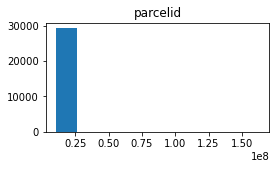

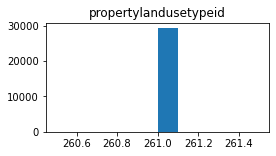

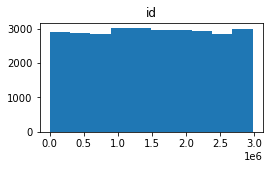

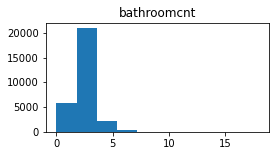

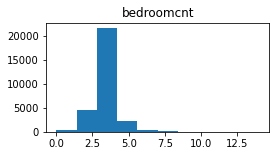

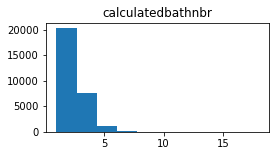

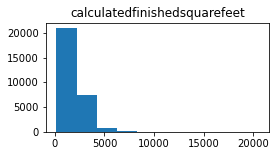

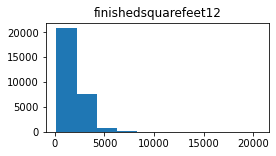

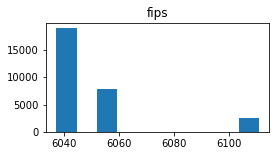

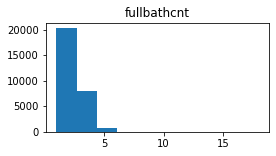

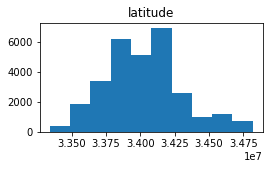

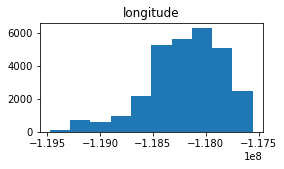

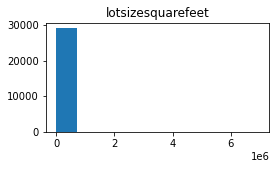

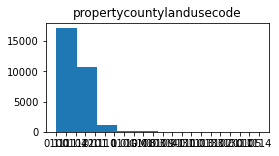

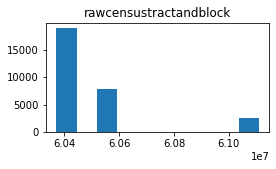

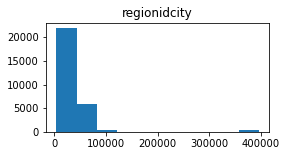

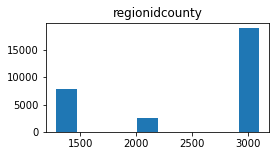

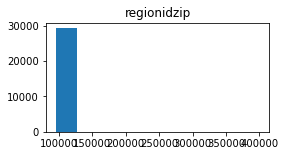

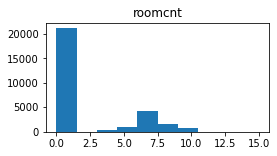

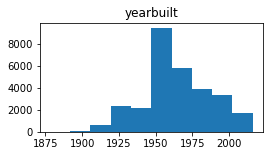

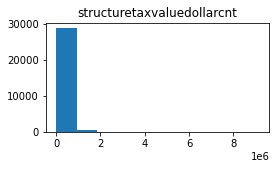

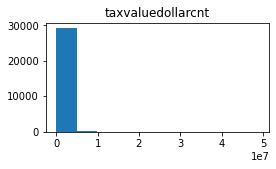

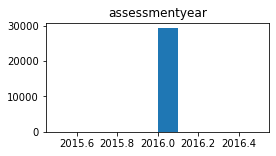

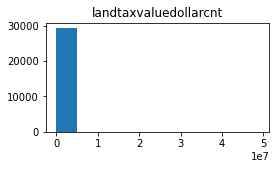

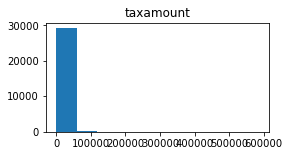

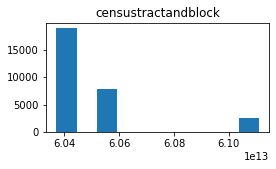

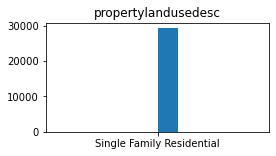

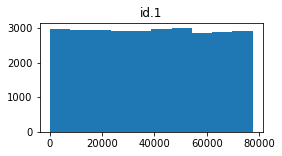

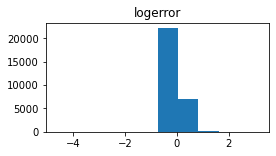

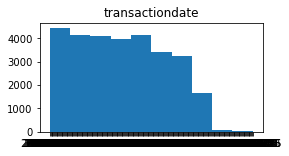

In [26]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()


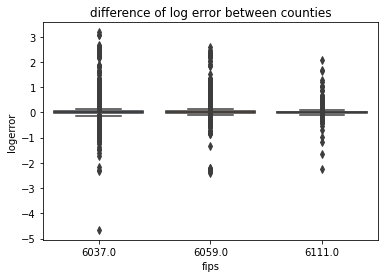

In [27]:
sns.boxplot(train.fips, train.logerror)
plt.title('difference of log error between counties')
plt.show()

<AxesSubplot:xlabel='fips', ylabel='logerror'>

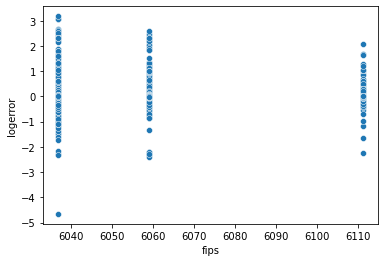

In [29]:
sns.scatterplot(x = 'fips', y ='logerror', data = train)

In [30]:
df.head()

parcelid  propertylandusetypeid       id          bathroomcnt  \
0  10952984                 261.00  2417912                 4.00   
1  12653289                 261.00  2871196                 2.00   
2  12612840                 261.00  1514581                 2.00   
3  12611007                 261.00   216904                 2.00   
4  12023386                 261.00   304078                 2.00   

            bedroomcnt    calculatedbathnbr  calculatedfinishedsquarefeet  \
0                 4.00                 4.00                      2,961.00   
1                 3.00                 2.00                      1,572.00   
2                 3.00                 2.00                      1,540.00   
3                 3.00                 2.00                      1,470.00   
4                 2.00                 2.00                      1,533.00   

   finishedsquarefeet12                 fips          fullbathcnt  ...  \
0              2,961.00             6,037.00                 4.00  ...   
1              1,572.00             6,037.00                 2.00  ...   
2              1,540.00             6,037.00                 2.00  ...   
3              1,470.00             6,037.00                 2.00  ...   
4              1,533.00             6,037.00                 2.00  ...   

   structuretaxvaluedollarcnt    taxvaluedollarcnt       assessmentyear  \
0                  331,167.00           546,265.00             2,016.00   
1                  105,762.00           227,863.00             2,016.00   
2                   29,440.00            63,380.00             2,016.00   
3                   71,733.00           182,691.00             2,016.00   
4                   52,583.00            87,557.00             2,016.00   

  landtaxvaluedollarcnt            taxamount   censustractandblock  \
0            215,098.00             6,071.89 60,373,102,012,023.00   
1            122,101.00             2,770.35 60,372,972,021,004.00   
2             33,940.00             1,104.70 60,376,700,022,008.00   
3            110,958.00             2,506.91 60,376,700,011,005.00   
4             34,974.00             1,229.29 60,371,943,003,004.00   

         propertylandusedesc  id.1             logerror  transactiondate  
0  Single Family Residential   892                 0.03       2017-01-05  
1  Single Family Residential   891                -0.08       2017-01-05  
2  Single Family Residential   889                 0.08       2017-01-05  
3  Single Family Residential   888                 0.10       2017-01-05  
4  Single Family Residential   886                -0.01       2017-01-05  

[5 rows x 30 columns]

In [40]:
df.columns.values.tolist()

['parcelid',
 'propertylandusetypeid',
 'id',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'propertylandusedesc',
 'id.1',
 'logerror',
 'transactiondate']

In [48]:
columns = [
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'fips',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'id.1',
 'logerror']

In [49]:

def plot_variable_pairs():
    for col in columns:
        sns.lmplot(x = col, y = 'logerror' , hue = 'fips', data = train, x_bins = 20)

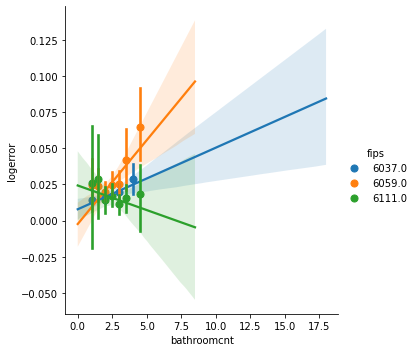

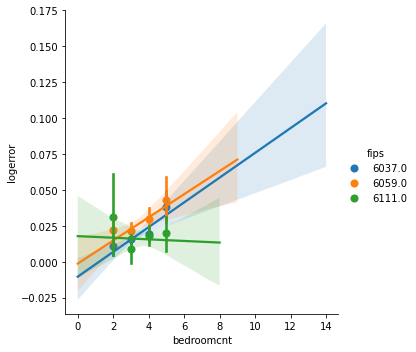

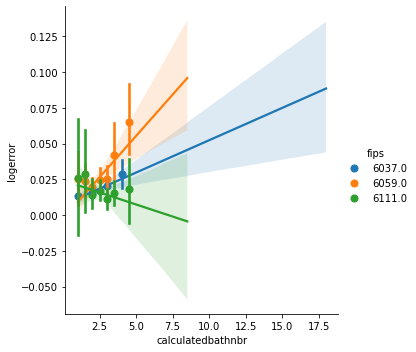

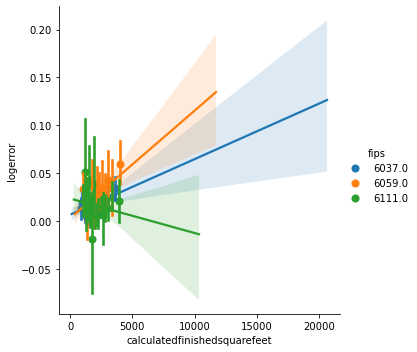

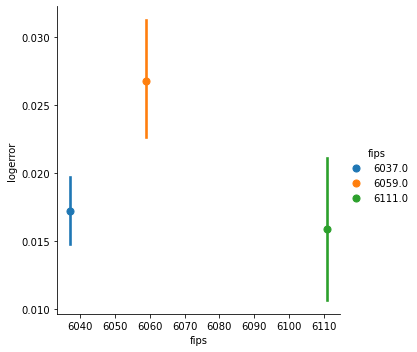

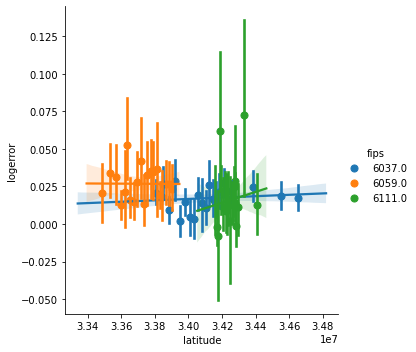

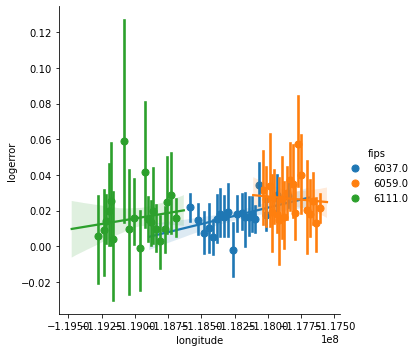

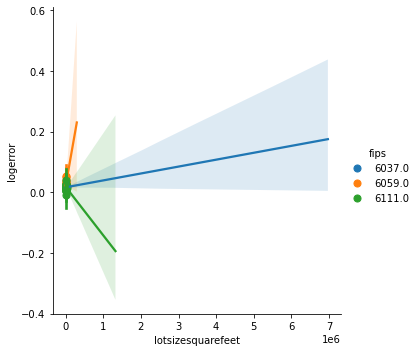

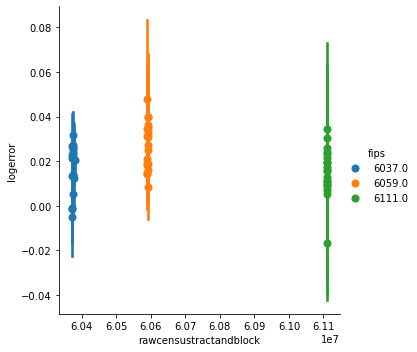

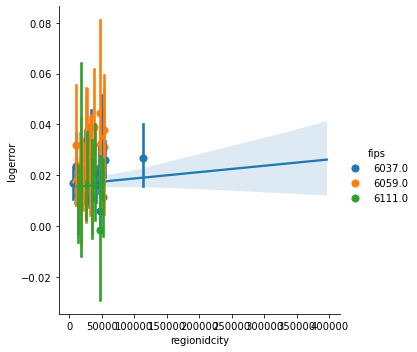

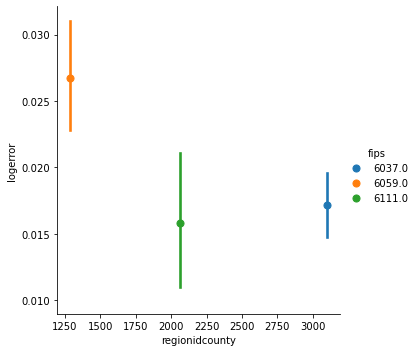

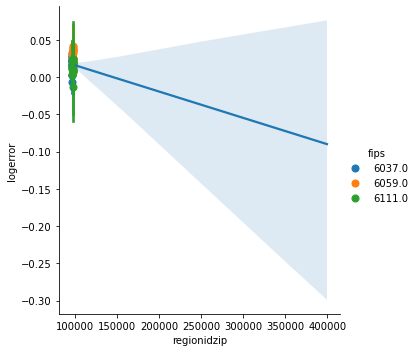

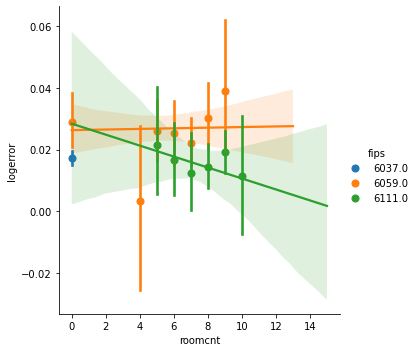

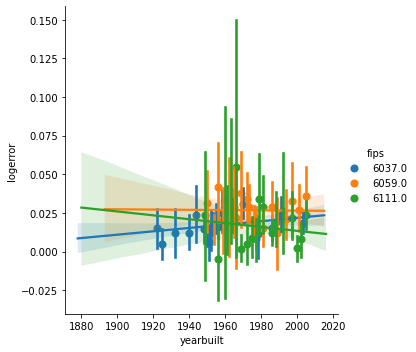

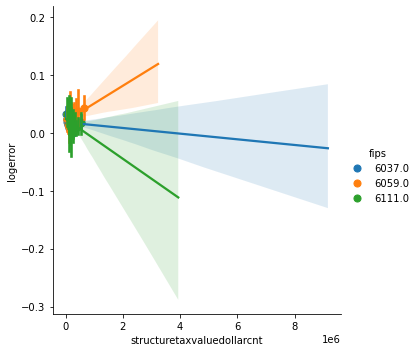

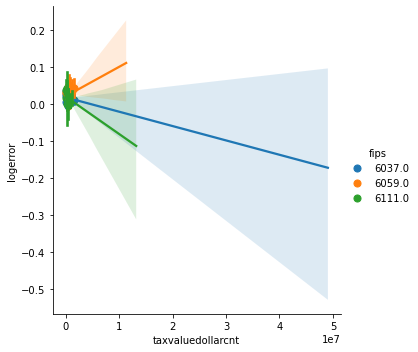

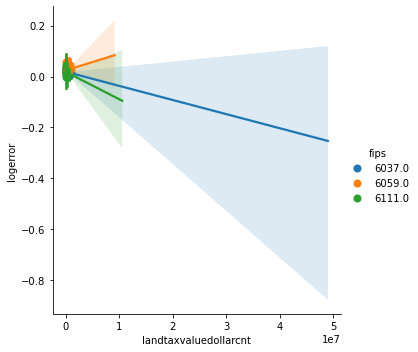

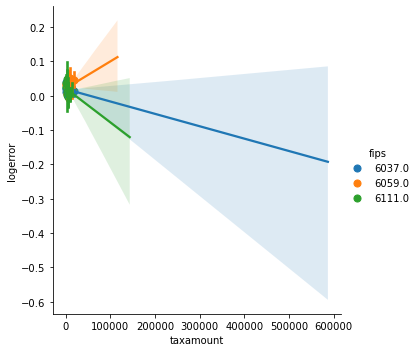

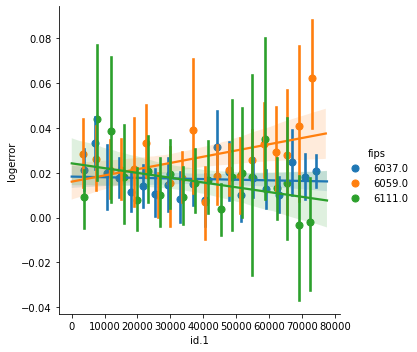

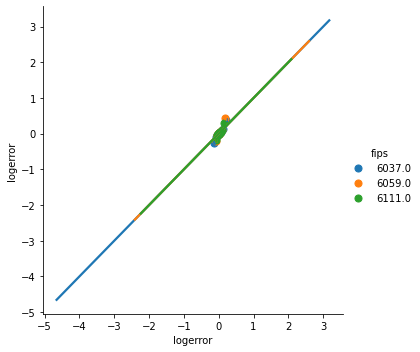

In [50]:
plot_variable_pairs()

In [51]:
df.logerror.min()

-4.65542037764

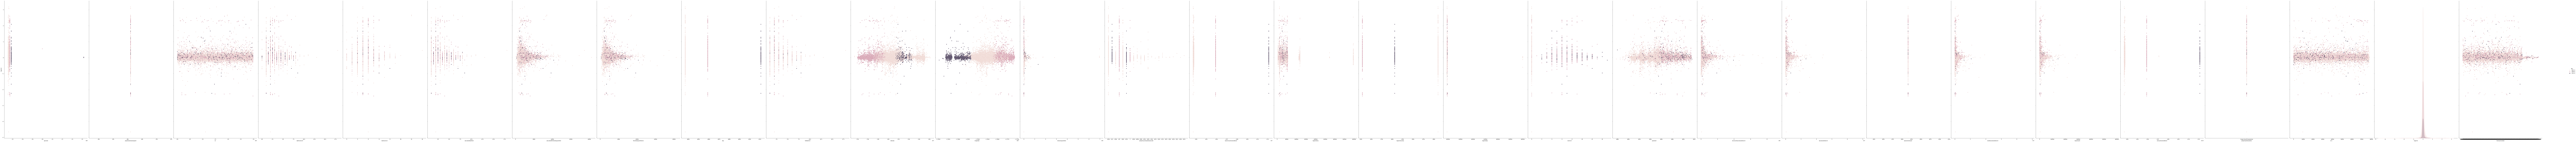

In [62]:
sns.pairplot(train, y_vars="logerror", x_vars=train.columns.values, hue = 'fips', size = 20, aspect = .6)

In [73]:

def pairplot():
    for col in columns:
        sns.pairplot(data =train, y_vars="logerror", x_vars = col, hue = 'fips')

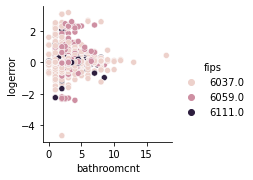

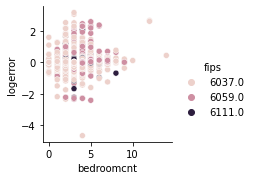

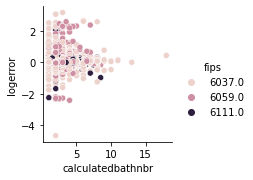

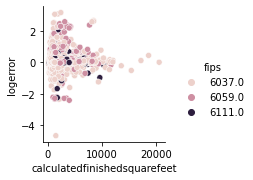

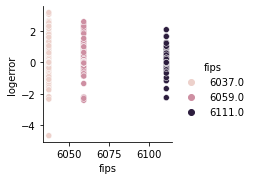

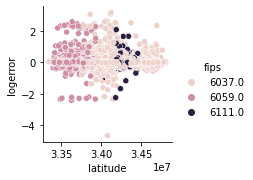

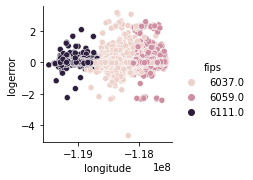

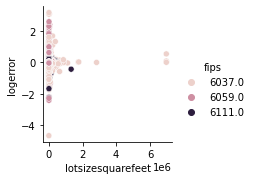

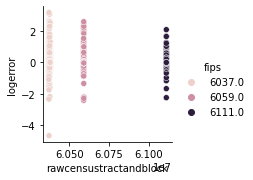

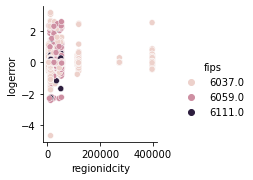

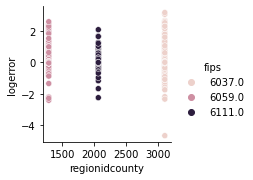

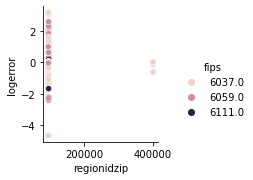

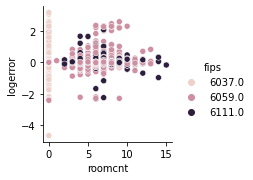

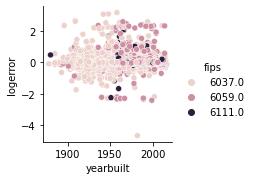

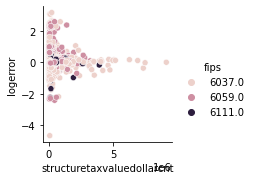

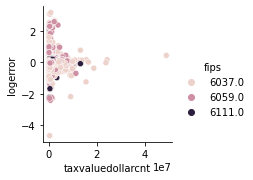

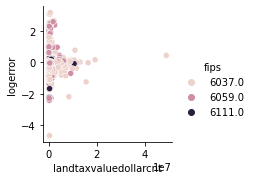

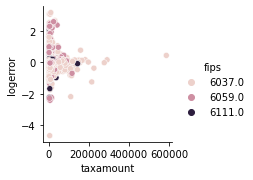

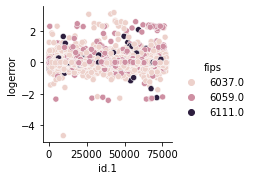

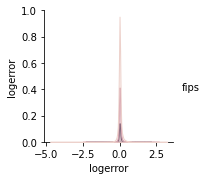

In [74]:
pairplot()

## try to get the mean of log error by county

In [76]:
train.logerror.mean()

0.019647080650353397

In [79]:
df_fips = train.groupby('fips')

In [84]:
train.groupby('fips', as_index=False)['logerror'].mean()

fips             logerror
0             6,037.00                 0.02
1             6,059.00                 0.03
2             6,111.00                 0.02